# Heart Rate Analysis of Data

Heart rate is a good indicator of the intensity of a workout and cardiovascular fitness. Higher heart rates indicate more intense workout and lower heart rates can indicate a less stressful workout. A lower resting heart rate and a shorter heart rate recovery time can indicate good cardiovasular fitness. Heart rate's correlation with fitness made it a good area to focus on in the fit data analysis. 

## Relationship between Heart Rate, Altitude, and Speed in Exercise

My first analysis focuses on the correlations between mean heart rate, altitude, and speed. I used line charts stacked on one another to easily visualize how these might be related. 

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from math import sin, cos, sqrt, atan2, radians

In [74]:
df = pd.read_csv('assets/strava.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['day'] = df['timestamp'].dt.strftime('%B %d, %Y')
df['time'] = df['timestamp'].dt.time
df_means = df[['datafile', 'heart_rate', 'enhanced_speed', 'timestamp', 'enhanced_altitude', 'day']]
df_means = df_means.groupby('day').mean()
df_means.reset_index(inplace=True)
df_means.head(5)


,day,heart_rate,enhanced_speed,enhanced_altitude
0,"August 01, 2019",127.416988,2.361761,276.465637
1,"August 02, 2019",102.106195,2.029106,456.401770
2,"August 03, 2019",127.827273,2.396082,265.910000
3,"August 04, 2019",121.239078,2.050475,262.485437
4,"August 05, 2019",127.883929,2.261036,262.133036


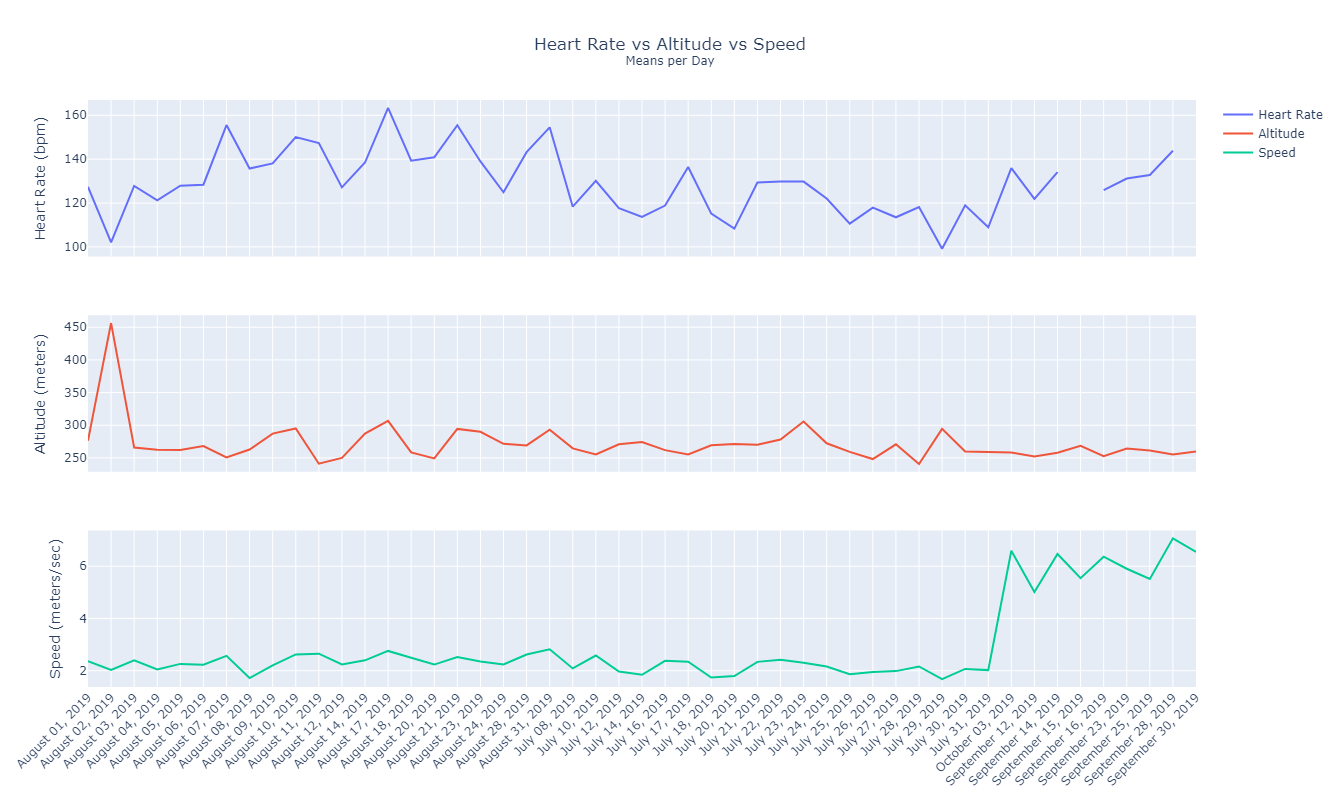

In [73]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True)
fig.add_trace(go.Scatter(x=df_means['day'], y=df_means['heart_rate'], name='Heart Rate'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_means['day'], y=df_means['enhanced_altitude'], name='Altitude'), row=2, col=1)
fig.add_trace(go.Scatter(x=df_means['day'], y=df_means['enhanced_speed'], name='Speed'), row=3, col=1)

fig.update_yaxes(title_text='Heart Rate (bpm)', row=1, col=1)
fig.update_yaxes(title_text='Altitude (meters)', row=2, col=1)
fig.update_yaxes(title_text='Speed (meters/sec)', row=3, col=1)
fig.update_xaxes(tickangle=-45)

fig.update_layout(height=800, title={
        'text': f"Heart Rate vs Altitude vs Speed<br><sup>Means per Day</sup>",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }) 

fig.show()

The three stacked line charts show me that heart rate, altitude, and speed often are related. Looking specifically at the increases on August 10th, August 17th, August 21st, and August 31st, all three factors are elevated. The ups and downs of the lines are similar in all three charts. There is also an uptick in speed and heart rate in September.One outlier from the pattern is on August 2nd when the altitude is abnormally high, but the speed and heart rate readings are lower. While this data is not conclusive on the relationship between the three, there is enough of a relationship in this dataset that a viewer can see similar patterns with the naked eye. The hover ability of the charts allows the user to confirm measurements of exact data points. 

## Does Starting & Ending Heart Rate Difference Decrease Over Time?

A persons heart rate is different when resting and when exercising. The heart rate is lower at rest and increases with intensity of physical exertion. My hypothesis is that as Professor Brookes becomes more accustomed to exercising and betters his cardiovascular health, the difference between his resting and active heart rates will decrease. I grouped the data by datafile, because it seemed to me that each datafile was a different fitness event. The previous chart the readings grouped by day, but this could mean that Professor Brookes recovered and started another fitness event in the same day and that would skew my results, so I narrowed it down to each event. A few events did not have heart rate data, so they were excluded, but I don't think there was enough missing data to compromise the integrity of the visualization.

In [75]:
df_hr_start = df[['datafile', 'heart_rate']]
df_hr_end = df[['datafile', 'heart_rate']]
df_hr_start = df_hr_start.groupby('datafile')['heart_rate'].first().reset_index()                
df_hr_end = df_hr_end.groupby('datafile')['heart_rate'].last().reset_index()
df_hr = pd.merge(df_hr_start, df_hr_end, on='datafile')
rename_map = {file: f'Fitness Event {i+1}' for i, file in enumerate(df_hr['datafile'])}
df_hr['datafile'] = df_hr['datafile'].map(rename_map)
df_hr = df_hr.rename(columns={'heart_rate_x' : 'Starting Heart Rate', 'heart_rate_y' : 'Ending Heart Rate', 'datafile' : 'Fitness Event'})
df_hr = pd.melt(df_hr, id_vars=['Fitness Event'], value_vars=['Starting Heart Rate', 'Ending Heart Rate'], var_name='Starting/Ending Heart Rate', value_name='Heart Rate')
df_hr = df_hr.dropna()
df_hr.head(5)



,Fitness Event,Starting/Ending Heart Rate,Heart Rate
0,Fitness Event 1,Starting Heart Rate,68.0
1,Fitness Event 2,Starting Heart Rate,71.0
2,Fitness Event 3,Starting Heart Rate,121.0
3,Fitness Event 4,Starting Heart Rate,124.0
4,Fitness Event 5,Starting Heart Rate,73.0


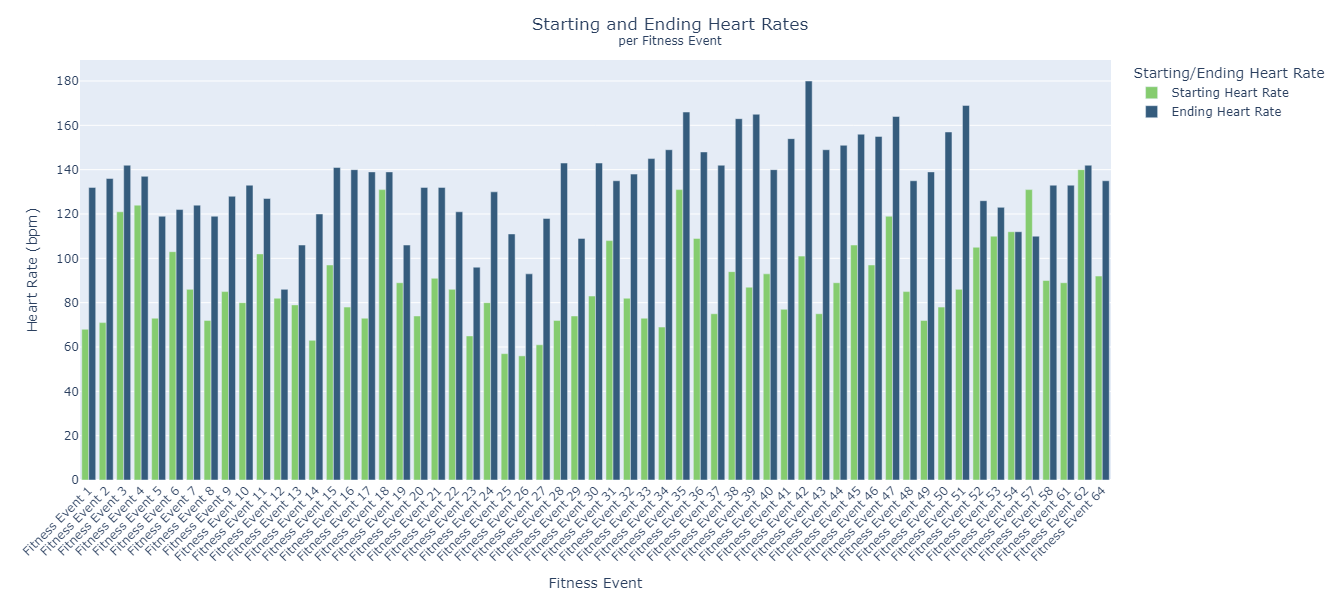

In [81]:
color_code = {'Starting Heart Rate' : '#85cc6f', 'Ending Heart Rate' : '#355c7d'}
fig = px.bar(df_hr, x='Fitness Event', y='Heart Rate', color='Starting/Ending Heart Rate', barmode='group', color_discrete_map=color_code)

fig.update_layout(height=600, width=1400, title={
        'text': f"Starting and Ending Heart Rates<br><sup>per Fitness Event</sup>",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }) 
fig.update_yaxes(title_text='Heart Rate (bpm)', row=1, col=1)
fig.update_xaxes(tickangle=-45)
fig.show()

In [86]:
df_hr_start2 = df[['datafile', 'heart_rate']]
df_hr_end2 = df[['datafile', 'heart_rate']]
df_hr_start2 = df_hr_start2.groupby('datafile')['heart_rate'].first().reset_index()                
df_hr_end2 = df_hr_end2.groupby('datafile')['heart_rate'].last().reset_index()
df_hr2 = pd.merge(df_hr_start2, df_hr_end2, on='datafile')
rename_map2 = {file: f'Fitness Event {i+1}' for i, file in enumerate(df_hr2['datafile'])}
df_hr2['datafile'] = df_hr2['datafile'].map(rename_map2)
df_hr2 = df_hr2.rename(columns={'heart_rate_x' : 'Starting Heart Rate', 'heart_rate_y' : 'Ending Heart Rate', 'datafile' : 'Fitness Event'})
df_hr2['Heart Rate Difference'] = df_hr2['Ending Heart Rate'] - df_hr2['Starting Heart Rate']
df_hr2 = df_hr2.dropna()
df_hr2.head(5)

,Fitness Event,Starting Heart Rate,Ending Heart Rate,Heart Rate Difference
0,Fitness Event 1,68.0,132.0,64.0
1,Fitness Event 2,71.0,136.0,65.0
2,Fitness Event 3,121.0,142.0,21.0
3,Fitness Event 4,124.0,137.0,13.0
4,Fitness Event 5,73.0,119.0,46.0


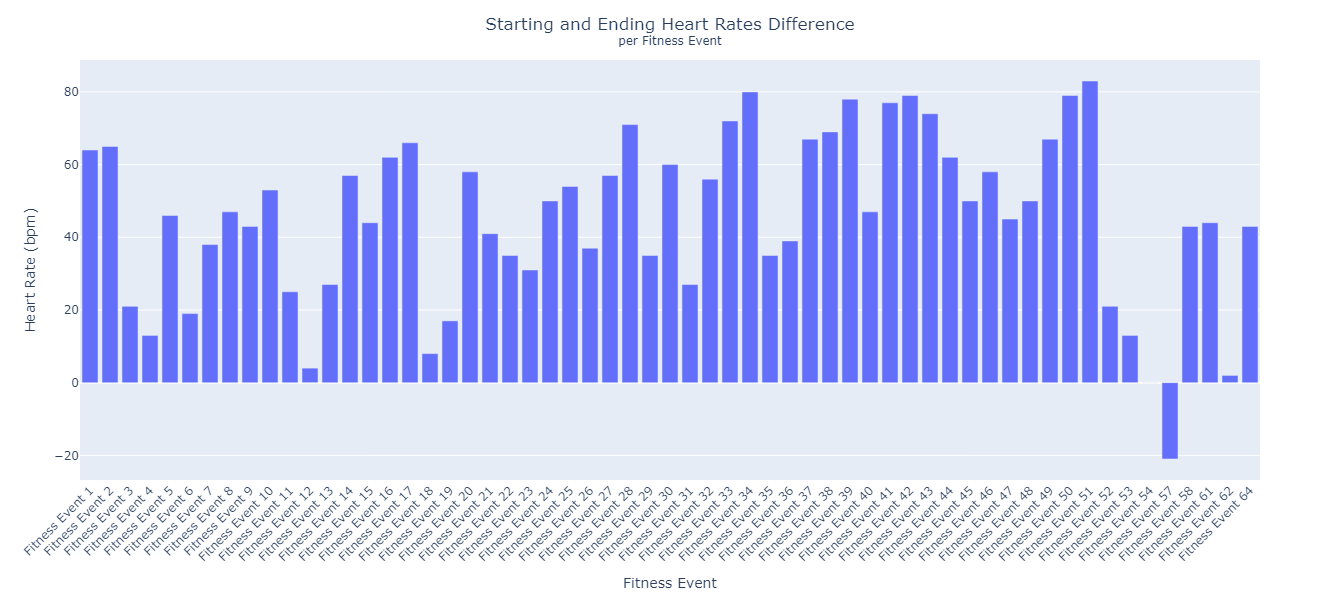

In [89]:
fig = px.bar(df_hr2, x='Fitness Event', y='Heart Rate Difference')

fig.update_layout(height=600, width=1400, title={
        'text': f"Starting and Ending Heart Rates Difference<br><sup>per Fitness Event</sup>",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }) 
fig.update_yaxes(title_text='Heart Rate (bpm)', row=1, col=1)
fig.update_xaxes(tickangle=-45)
fig.show()

The ending heart rate was greater than the starting heart rate in all but one fitness event. This may have been due an error with the reading technology or Professor Brookes may have accidentally kept recording his heart rate for that event long after he had cooled down from his exercise. There appears to be a lot of change in the difference between starting and ending heart rates. The last five or six differences appear to show a downward trend, but there I don't think the trend is significant enough to be confirm my hypothesis. I expected there to be a trending decline at least by the 30th fitness event. It would be interesting to add in another variable to better gauge the intensity of each fitness event. If Professor Brookes steadily increased the intensity of his workouts, this could be a reason for no significant decline in the difference between starting and ending heart rate. 